# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a [regression problem](https://en.wikipedia.org/wiki/Regression_analysis) but in our case, we're going to simplify it to be: predicting a continuous number.

For example, you might want to:
- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

We're going to set the foundations for how to take a sample of inputs (this is your data), build a neural network to discover patterns in those inputs and then make a prediction (in the form of a number) based on those inputs.

## What we're going to cover

Specifically, we're going to go through doing the following with TensorFlow:
- Architecture of a regression model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
  - Visualizng the model
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model

# Typical architecture of a regresison neural network

Following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.


| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |



> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

In [121]:
# Importing Necessary Libraries:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [122]:
# Creating Random Linear Data:

# Features / Independent Variables:
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Label / Target ? Dependent Variable:
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

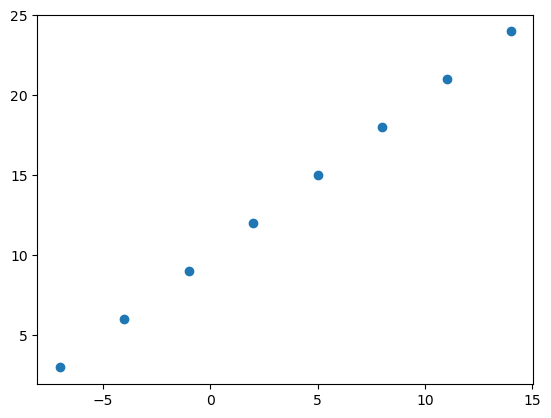

In [123]:
# Visualizing Data:
plt.scatter(X,y)
plt.show()

# Input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [124]:
X = tf.constant(X)
y = tf.constant(y)

In [125]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

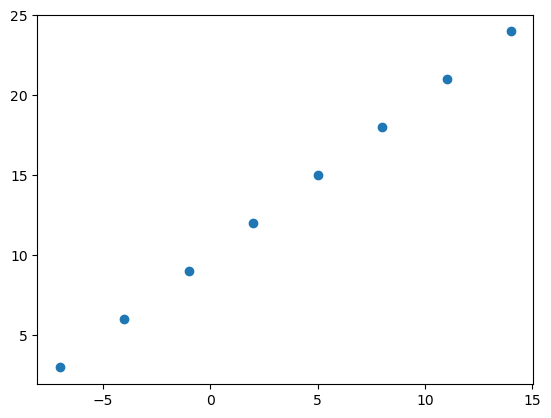

In [126]:
plt.scatter(X,y)
plt.show()

Our goal here will be to use `X` to predict `y`.

So our **input** will be `X` and our **output** will be `y`.

Knowing this, what do you think our input and output shapes will be?

In [127]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

From this it seems our inputs and outputs have no shape?

How could that be?

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as ouput some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specificially a rank 0 tensor or a scalar.

In [128]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float64, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.0>)

In our case, we're trying to build a model to predict the pattern between `X[0]` equalling `-7.0` and `y[0]` equalling `3.0`.

So now we get our answer, we're trying to use 1 `X` value to predict 1 `y` value.

The concepts of input and output shapes to a model are fundamental. 

In fact, they're probably two of the things we'll spend the most time on when we work with neural networks: **making sure your input and outputs are in the correct shape**.

![example of input and output shapes for a housing price prediction problem](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/01-input-and-output-shapes-housing-prices.png)
*If you were working on building a machine learning algorithm for predicting housing prices, your inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since you're trying to predict the price of the house, your output shape would be 1.*

In [129]:
X.shape

TensorShape([8])

In [130]:
X

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>

In [131]:
tf.reshape(X, shape=(8,1))

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [132]:
# We will need to reshape X as MOdels in tensorflow Requires Input
# Dimension to be Atleast 2.

# Steps in modelling

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.

In [133]:
from tensorflow.keras import Sequential # To Create Model Using Sequential API
from tensorflow.keras.layers import Dense # To Create Dense Neurons in Network

In [134]:
tf.random.set_seed(42) # To re-produce same results every time

base_model = Sequential() # Creating A Sequential Model

base_model.add(Dense(1)) # Adding One Dense Neuron in Model

# Compiling the Model
base_model.compile(loss= "mae", # MAE = Mean Absolute Error
             optimizer = "sgd", # SGD = Stochastic Gradient Descent
             metrics= ["mae"]) 

# Fitting The Model with Our Data
base_model.fit(tf.reshape(X, shape= (8,1)) , y, epochs= 5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - loss: 11.5964 - mae: 11.5964
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.4639 - mae: 11.4639
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.3314 - mae: 11.3314
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.1989 - mae: 11.1989
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 11.0664 - mae: 11.0664


### Trying to Predict value of y using our Trained Model:

Keep in mind that Relationship between our Original Data is y = X + 10.

In [135]:
X

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>

In [136]:
y

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>

In [137]:
X + 10

<tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>

In [138]:
# Making a Prediction Using Trained Model:
base_model.predict(tf.constant([[17.0]])) # Because we need to pass tensor to our model.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[12.270948]], dtype=float32)

It doesn't go very well... it should've output something close to 27.0.
(y = X + 10) ..> X = 17 ..> y = 27.

> 🤔 **Question:** What's Keras? I thought we were working with TensorFlow but every time we write TensorFlow code, `keras` comes after `tf` (e.g. `tf.keras.layers.Dense()`)?

Before TensorFlow 2.0+, [Keras](https://keras.io/) was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated within the TensorFlow library.

# Improving a model

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here we might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [139]:
# Creating Improved Model by Increasing the Training Time (Number of Epochs):

tf.random.set_seed(42)

imprvd_model1 = Sequential()

imprvd_model1.add(Dense(1))

imprvd_model1.compile(optimizer= "sgd",
                     loss= "mae",
                     metrics= ["mae"])

imprvd_model1.fit(tf.reshape(X, shape= (8,1)), y, epochs= 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - loss: 19.4861 - mae: 19.4861
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 19.2049 - mae: 19.2049
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 18.9236 - mae: 18.9236
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 18.6424 - mae: 18.6424
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 18.3611 - mae: 18.3611
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 18.0799 - mae: 18.0799
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 17.7986 - mae: 17.7986
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 17.5174 - mae: 17.5174
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 17.2361 - mae: 17.2361
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 16.9549 - mae: 16.9549
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 16.6736 - mae: 16.6736
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 16.3924 - mae: 16.3924
Epoch 13/100
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.5845 - mae: 7.5845
Epoch 73/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.4520 - mae: 7.4520
Epoch 74/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 7.3195 - mae: 7.3195
Epoch 75/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.1870 - mae: 7.1870
Epoch 76/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.0545 - mae: 7.0545
Epoch 77/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 6.9619 - mae: 6.9619
Epoch 78/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.9563 - mae: 6.9563
Epoch 79/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 6.9506 - mae: 6.9506
Epoch 80/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 6.9450 - mae: 6.9450
Epoch 81/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 6.9394 - mae: 6.9394
Epoch 82/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 6.9338 - mae: 6.9338
Epoch 83/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 6.9281 - mae: 6.9281
Epoch 84/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - 

In [140]:
# MAE is down to 6.9 from 13.6 in Previous Model.

In [141]:
# Making a Prediction Using Improved Model:
imprvd_model1.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[29.362745]], dtype=float32)

In [142]:
# Our Prediction Should be 27.
# This Model is quite close to getting correct prediction than base model.

In [143]:
# Creating Improved Model by Increasing the Hidden layers, Number of Neurons
# and Using Activation Functions for layers:

tf.random.set_seed(42)

imprvd_model2 = Sequential()

imprvd_model2.add(Dense(10, activation= "relu"))
imprvd_model2.add(Dense(5, activation= "relu"))
imprvd_model2.add(Dense(1))


imprvd_model2.compile(optimizer= "sgd",
                     loss= "mae",
                     metrics= ["mae"])

imprvd_model2.fit(tf.reshape(X, shape= (8,1)), y, epochs= 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - loss: 15.7194 - mae: 15.7194
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 14.9751 - mae: 14.9751
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 14.2966 - mae: 14.2966
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 13.8149 - mae: 13.8149
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 13.4053 - mae: 13.4053
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.0288 - mae: 13.0288
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 12.6722 - mae: 12.6722
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 12.4639 - mae: 12.4639
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 12.2476 - mae: 12.2476
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.0067 - mae: 12.0067
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 11.7352 - mae: 11.7352
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 11.4261 - mae: 11.4261
Epoch 13/100
1/1 ━━━━━━━

In [144]:
imprvd_model2.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[30.093225]], dtype=float32)

In [145]:
# Creating Improved Model by Changing the Optimizer and Adjusting Learning Rate:

tf.random.set_seed(42)

imprvd_model3 = Sequential()

imprvd_model3.add(Dense(10, activation= "relu"))
imprvd_model3.add(Dense(5, activation= "relu"))
imprvd_model3.add(Dense(1))


imprvd_model3.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.01),
                     loss= "mae",
                     metrics= ["mae"])

imprvd_model3.fit(tf.reshape(X, shape= (8,1)), y, epochs= 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 12.4850 - mae: 12.4850
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.4093 - mae: 12.4093
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.3316 - mae: 12.3316
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12.2518 - mae: 12.2518
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 12.2856 - mae: 12.2856
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 12.1814 - mae: 12.1814
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 12.0454 - mae: 12.0454
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.9784 - mae: 11.9784
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 11.9062 - mae: 11.9062
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 11.8289 - mae: 11.8289
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 11.7466 - mae: 11.7466
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 11.6586 - mae: 11.6586
Epoch 13/100
1/1 ━━━━━━━━━

In [146]:
imprvd_model3.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[26.81577]], dtype=float32)

In [147]:
# This Model is Quite Improved compared to All Previous Ones.

# Evaluating a model 

A typical workflow we'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.


When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize." 

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use.

In [177]:
# Making a Bigger Dataset:

# Features:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [178]:
# Like Our last Data, We will follow same Pattern for Creating Label: y = X+10:

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [179]:
X.ndim, X.shape

(1, TensorShape([50]))

In [180]:
# Reshaping X so that it has 2 Dimensions:
X = tf.reshape(X, shape=(50,1))

In [181]:
X.ndim, X.shape

(2, TensorShape([50, 1]))

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

> 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [182]:
len(X), len(y)

(50, 50)

In [183]:
# Splitting Data and Labels into Training and Test Sets:

X_train = X[:40, :]
y_train = y[:40]

X_test = X[40:, :]
y_test = y[40:]

In [184]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(TensorShape([40, 1]),
 TensorShape([10, 1]),
 TensorShape([40]),
 TensorShape([10]))

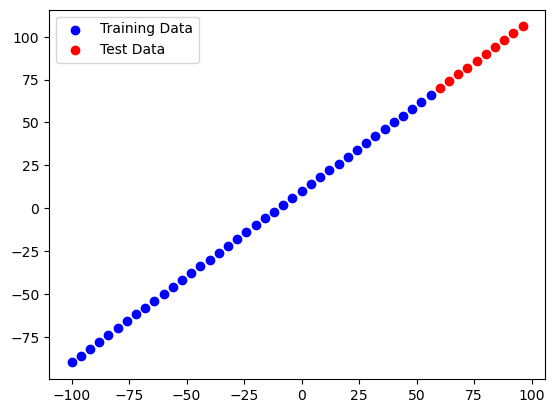

In [185]:
# Visualizinf Training and Test Data:

plt.scatter(X_train, y_train, c= "blue", label= "Training Data")
plt.scatter(X_test, y_test, c= "red", label= "Test Data")
plt.legend()
plt.show()

## Visualizing the model

After you've built a model, you might want to take a look at it (especially if you haven't built many before).

You can take a look at the layers and shapes of your model by calling [`summary()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary) on it.

> 🔑 **Note:** Visualizing a model is particularly helpful when you run into input and output shape mismatches.

In [214]:
# Building Model:

tf.random.set_seed(42)

model = Sequential()

model.add(Dense(1))

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.1),
                     loss= "mae",
                     metrics= ["mae"])

In [215]:
model.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [119]:
# to get a Proper Model Summary, we either have to Fit the Model with some data,
# or we can provide "input_shape" in first layer of the Model.

In [229]:
# Building Same Model with "input_shape" argument in first Layer:

tf.random.set_seed(42)

model = Sequential()

model.add(Dense(1, input_shape= [1,]))

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.1),
                     loss= "mae",
                     metrics= ["mae"])

C:\Users\shail\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [230]:
model.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

> 📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk).

In [231]:
# training The Model:

model.fit(X_train, y_train, epochs= 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.2382 - mae: 13.2382  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.7167 - mae: 7.7167 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.6552 - mae: 9.6552
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.6458 - mae: 9.6458
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.2577 - mae: 8.2577
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.0846 - mae: 7.0846 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.1074 - mae: 8.1074 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.5713 - mae: 7.5713
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.4952 - mae: 6.4952
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.1426 - mae: 7.1426
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.8908 - mae: 6.8908
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0504 - mae: 6.0504 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms

## Visualizing the predictions

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` vs. `y_pred` (ground truth vs. predictions).

In [232]:
# Creating a Function to plot Training Data, Test Data and Predictions:

def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions):
    
    """
    Plots Training and Testing data With Predictions from Model.
    """
    
    plt.figure(figsize=(10,8))
    
    # Plotting Training Data:
    plt.scatter(train_data, train_labels, c= "blue", label= "Training Data")
    
    # Plotting Test Data:
    plt.scatter(test_data, test_labels, c= "green", label= "Testing Data")
    
    # Plotting Predictions:
    plt.scatter(test_data, predictions, c= "red", label= "Predictions")
    
    plt.legend()
    
    plt.show()

In [233]:
# Making Predictions Using Trained Model:

y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [234]:
y_pred

array([[ 68.18023 ],
       [ 72.058495],
       [ 75.93676 ],
       [ 79.815025],
       [ 83.6933  ],
       [ 87.57156 ],
       [ 91.44983 ],
       [ 95.328094],
       [ 99.20636 ],
       [103.084625]], dtype=float32)

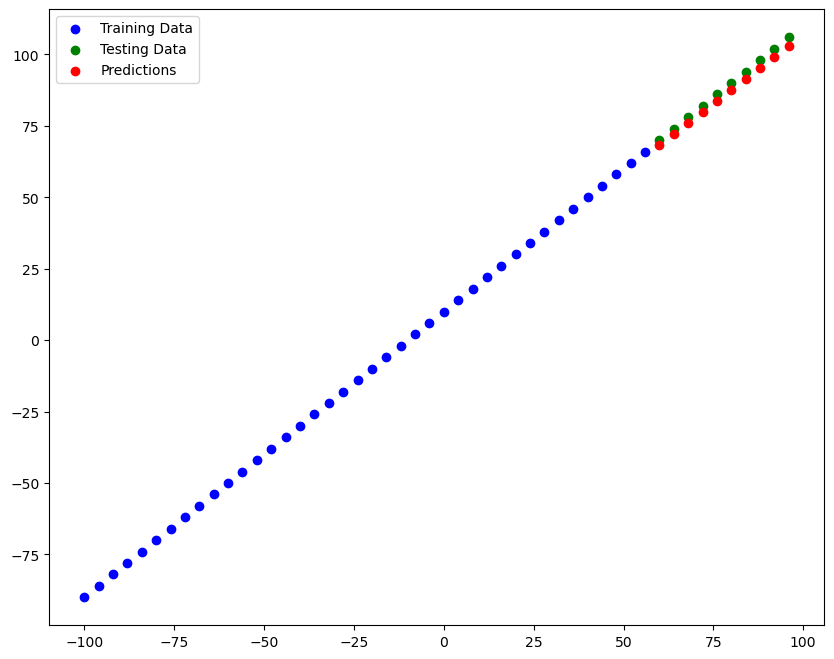

In [235]:
# Plotting:

plot_predictions(X_train, 
                y_train,
                X_test,
                y_test,
                y_pred)

## Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem we're working on, different models have different evaluation metrics. 

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.

In [236]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 2.3676 - mae: 2.3676


[2.367572069168091, 2.367572069168091]

In [237]:
# Mean Absolute Error:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.8197708, 1.9415054, 2.06324  , 2.1849747, 2.3067017, 2.4284363,
       2.550171 , 2.6719055, 2.7936401, 2.9153748], dtype=float32)>

Huh? That's strange, MAE should be a single output.

Instead, we get 10 values.

This is because our `y_test` and `y_preds` tensors are different shapes.

In [238]:
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

In [239]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 68.18023 ,  72.058495,  75.93676 ,  79.815025,  83.6933  ,
        87.57156 ,  91.44983 ,  95.328094,  99.20636 , 103.084625],
      dtype=float32)>

In [240]:
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.367572>

In [241]:
# Mean Squared Error:

mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5.7276545>

## Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

### Model_1:

In [242]:
tf.random.set_seed(42)

model_1 = Sequential()

model_1.add(Dense(1, input_shape= [1,]))

model_1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.1),
                     loss= "mae",
                     metrics= ["mae"])

model_1.fit(X_train, y_train, epochs= 100)

Epoch 1/100


C:\Users\shail\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 18.7079 - mae: 18.7079 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.5693 - mae: 12.5693
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.3944 - mae: 8.3944 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.5842 - mae: 9.5842
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.7797 - mae: 10.7797
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.0375 - mae: 9.0375 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.9013 - mae: 6.9013
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0050 - mae: 8.0050 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.3927 - mae: 8.3927
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8223 - mae: 7.8223 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5967 - mae: 6.5967 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.6719 - mae: 6.6719
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

In [243]:
# Predictions:
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[ 70.79859 ],
       [ 74.8542  ],
       [ 78.90981 ],
       [ 82.96542 ],
       [ 87.02104 ],
       [ 91.07665 ],
       [ 95.13226 ],
       [ 99.187874],
       [103.243484],
       [107.299095]], dtype=float32)

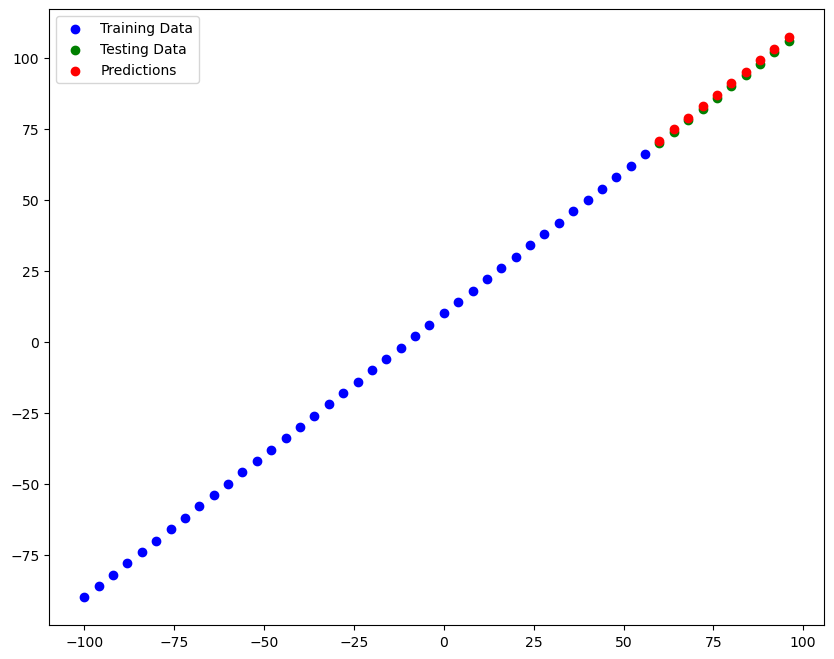

In [244]:
# Plotting Predictions:
plot_predictions(X_train,
                y_train,
                X_test,
                y_test,
                y_pred_1)

In [245]:
# MAE and MSE:
mae1 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_1))
mse1 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_1))

In [246]:
mae1, mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0488441>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.1255885>)

### Model_2:

In [247]:
tf.random.set_seed(42)

model_2 = Sequential()

model_2.add(Dense(1, input_shape= [1,]))
model_2.add(Dense(1))

model_2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.1),
                     loss= "mae",
                     metrics= ["mae"])

model_2.fit(X_train, y_train, epochs= 100)

Epoch 1/100


C:\Users\shail\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 14.2610 - mae: 14.2610  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.5521 - mae: 8.5521
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.3516 - mae: 9.3516 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.9066 - mae: 6.9066
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.9602 - mae: 7.9602
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.5469 - mae: 6.5469
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.0524 - mae: 7.0524
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.0123 - mae: 6.0123
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.4837 - mae: 6.4837
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.3346 - mae: 6.3346
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.8137 - mae: 4.8137
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5305 - mae: 5.5305 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss:

Epoch 73/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3577 - mae: 0.3577 
Epoch 74/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7400 - mae: 0.7400 
Epoch 75/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3671 - mae: 0.3671 
Epoch 76/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7608 - mae: 0.7608 
Epoch 77/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3348 - mae: 0.3348 
Epoch 78/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7583 - mae: 0.7583 
Epoch 79/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3273 - mae: 0.3273 
Epoch 80/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7955 - mae: 0.7955 
Epoch 81/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2619 - mae: 0.2619
Epoch 82/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8590 - mae: 0.8590
Epoch 83/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1762 - mae: 0.1762
Epoch 84/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9760 - mae: 0.9760
Epoch 85/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [248]:
# Predictions:
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[ 69.67598 ],
       [ 73.65579 ],
       [ 77.63561 ],
       [ 81.615425],
       [ 85.59524 ],
       [ 89.57506 ],
       [ 93.55488 ],
       [ 97.53468 ],
       [101.5145  ],
       [105.49432 ]], dtype=float32)

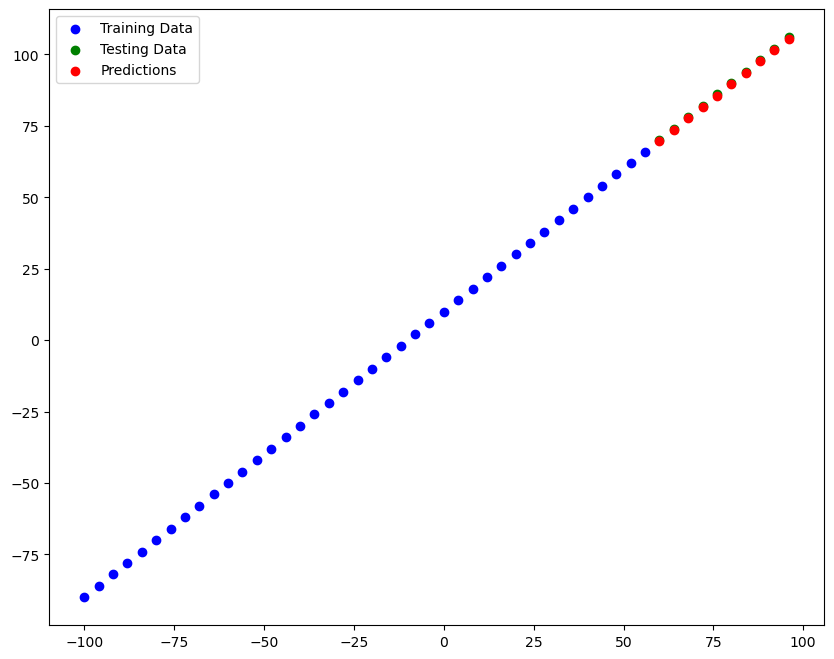

In [249]:
# Plotting Predictions:
plot_predictions(X_train,
                y_train,
                X_test,
                y_test,
                y_pred_2)

In [250]:
# MAE and MSE:
mae2 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_2))
mse2 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_2))

In [251]:
mae2, mse2

(<tf.Tensor: shape=(), dtype=float32, numpy=0.41485062>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.1754621>)

### Model_3:

In [252]:
tf.random.set_seed(42)

model_3 = Sequential()

model_3.add(Dense(10, input_shape= [1,]))
model_3.add(Dense(1))

model_3.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.1),
                     loss= "mae",
                     metrics= ["mae"])

model_3.fit(X_train, y_train, epochs= 500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 61.7796 - mae: 61.7796 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.3779 - mae: 12.3779 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31.5351 - mae: 31.5351 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.9102 - mae: 15.9102 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.0765 - mae: 15.0765 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22.1340 - mae: 22.1340
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.1097 - mae: 17.1097  
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.2559 - mae: 7.2559
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.1353 - mae: 11.1353
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.2942 - mae: 12.2942 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.3360 - mae: 7.3360
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8492 - mae: 6.8492 
Epoch 13/500
2/2 ━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3708 - mae: 0.3708 
Epoch 144/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4985 - mae: 0.4985 
Epoch 145/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2258 - mae: 1.2258
Epoch 146/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2779 - mae: 2.2779 
Epoch 147/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8969 - mae: 1.8969 
Epoch 148/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2321 - mae: 1.2321 
Epoch 149/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4728 - mae: 0.4728 
Epoch 150/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5780 - mae: 0.5780 
Epoch 151/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3351 - mae: 1.3351
Epoch 152/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2206 - mae: 0.2206
Epoch 153/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0749 - mae: 0.0749
Epoch 154/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1095 - mae: 1.1095 
Epoch 155/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3203 - mae: 0.3203 
Epoch 286/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7470 - mae: 0.7470 
Epoch 287/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2346 - mae: 1.2346 
Epoch 288/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4618 - mae: 0.4618
Epoch 289/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.8723 - mae: 2.8723
Epoch 290/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7503 - mae: 0.7503 
Epoch 291/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7877 - mae: 3.7877
Epoch 292/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.5748 - mae: 2.5748
Epoch 293/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7615 - mae: 2.7615 
Epoch 294/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.0254 - mae: 4.0254
Epoch 295/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6530 - mae: 0.6530 
Epoch 296/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.0962 - mae: 5.0962
Epoch 297/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2738 - mae: 0.2738 
Epoch 428/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4639 - mae: 0.4639 
Epoch 429/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4775 - mae: 1.4775 
Epoch 430/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6607 - mae: 1.6607 
Epoch 431/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3369 - mae: 1.3369 
Epoch 432/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0571 - mae: 1.0571 
Epoch 433/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1703 - mae: 1.1703 
Epoch 434/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5488 - mae: 0.5488 
Epoch 435/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5020 - mae: 2.5020 
Epoch 436/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7487 - mae: 0.7487
Epoch 437/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2923 - mae: 3.2923  
Epoch 438/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.5868 - mae: 1.5868
Epoch 439/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [253]:
# Predictions:
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[ 71.03053 ],
       [ 75.10219 ],
       [ 79.17384 ],
       [ 83.24549 ],
       [ 87.317154],
       [ 91.3888  ],
       [ 95.46047 ],
       [ 99.53212 ],
       [103.6038  ],
       [107.675446]], dtype=float32)

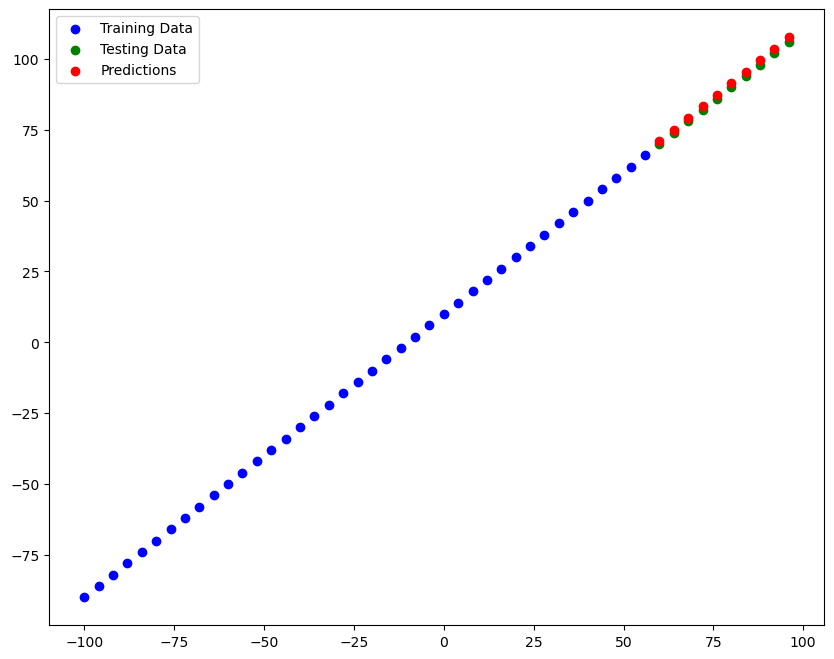

In [254]:
# Plotting Predictions:
plot_predictions(X_train,
                y_train,
                X_test,
                y_test,
                y_pred_3)

In [255]:
# MAE and MSE:
mae3 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_3))
mse3 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_3))

In [256]:
mae3, mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.3529847>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.8729292>)

## Comparing results

Now we've got results for 3 similar but slightly different results, let's compare them.

In [261]:
model_results = [["model_1", mae1.numpy(), mse1.numpy()],
                 ["model_2", mae2.numpy(), mse2.numpy()],
                 ["model_3", mae3.numpy(), mse3.numpy()]]

In [262]:
import pandas as pd
results = pd.DataFrame(model_results, columns= ["Model Name",
                                               "Mean Absolute Error",
                                               "Mean Squared Error"])

In [263]:
results

,Model Name,Mean Absolute Error,Mean Squared Error
0,model_1,1.048844,1.125589
1,model_2,0.414851,0.175462
2,model_3,1.352985,1.872929


From our experiments, it looks like `model_2` performed the best.

And now, you might be thinking, "wow, comparing models is tedious..." and it definitely can be, we've only compared 3 models here. 

But this is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.

Each model you build is a small experiment. 

> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work.

Another thing you'll also find is what you thought may work (such as training a model for longer) may not always work and the exact opposite is also often the case.

## Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

> 📖 **Resource:** But as you build more models, you'll want to look into using tools such as:
* [**TensorBoard**](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modelling experiments.
* [**Weights & Biases**](https://www.wandb.com/) - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

# Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [267]:
model_2.save("Regression_Model(Random Data).keras")

In [268]:
model_2.save("Regression_Model(Random Data).h5")

# Loading a model

We can load a saved model using the [`load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model) method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particuluar formats are correct).

In [269]:
loaded_Model_1 = tf.keras.models.load_model("Regression_Model(Random Data).keras")

In [270]:
loaded_Model_1.summary()

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (60.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10 (44.00 B)

In [271]:
model_2.summary()

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (60.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10 (44.00 B)

# A larger example

We're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

To do, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).

In [287]:
# Import Required Libraries:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split

In [277]:
df = pd.read_csv("insurance.csv")

In [278]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the [`get_dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method in pandas.

It converts categorical variables (like the `sex`, `smoker` and `region` columns) into numerical variables using one-hot encoding.

In [281]:
# Turning Categorical Columns into Numerical Using One Hot encoding:

df_one_hot = pd.get_dummies(df)
df_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [282]:
# Creating Features and Target:

X = df_one_hot.drop("charges", axis= 1)
y = df_one_hot["charges"]

In [283]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [284]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [288]:
# Train Test Split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,
                                                   random_state= 42)

In [289]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 11)
(268, 11)
(1070,)
(268,)


In [290]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [292]:
# Building a Neural Network:

tf.random.set_seed(42)

reg_model1 = Sequential()

reg_model1.add(Dense(10))
reg_model1.add(Dense(1))

reg_model1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss= "mae",
                  metrics= ["mae"])

reg_model1.fit(X_train, y_train, epochs= 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13276.5361 - mae: 13276.5361
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13069.5332 - mae: 13069.5332 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12576.5195 - mae: 12576.5195 
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11611.4688 - mae: 11611.4688
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10275.1602 - mae: 10275.1602
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8937.4678 - mae: 8937.4678
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7939.4614 - mae: 7939.4614
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7505.8037 - mae: 7505.8037
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7416.9458 - mae: 7416.9458
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7383.9062 - mae: 7383.9062
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7360.3618 - mae: 7360.3618
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [293]:
# Evaluating The Model:
reg_model1.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5360.4053 - mae: 5360.4053  


[5195.666015625, 5195.666015625]

In [294]:
df["charges"].mean()

13270.422265141257

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:
- Increasing the number of layers (2 -> 3).
- Increasing the number of units in each layer (except for the output layer).
- Train for Longer Time (More Epochs).
Everything else will stay the same.

In [303]:
# Building Another Neural Network:

tf.random.set_seed(42)

reg_model2 = Sequential()

reg_model2.add(Dense(100))
reg_model2.add(Dense(10))
reg_model2.add(Dense(1))

reg_model2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.01),
                  loss= "mae",
                  metrics= ["mae"])

history= reg_model2.fit(X_train, y_train, epochs= 200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12583.2666 - mae: 12583.2666
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7524.8975 - mae: 7524.8975
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7222.4243 - mae: 7222.4243
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7011.7490 - mae: 7011.7490
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6744.0547 - mae: 6744.0547
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6417.5171 - mae: 6417.5171 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6268.7617 - mae: 6268.7617
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6137.7559 - mae: 6137.7559
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6006.2827 - mae: 6006.2827 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5818.3955 - mae: 5818.3955 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5571.3618 - mae: 5571.3618 
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3639.5632 - mae: 3639.5632
Epoch 136/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3637.0520 - mae: 3637.0520
Epoch 137/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3647.2258 - mae: 3647.2258 
Epoch 138/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3610.5662 - mae: 3610.5662 
Epoch 139/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 3614.7407 - mae: 3614.7407
Epoch 140/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3620.2644 - mae: 3620.2644 
Epoch 141/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3636.9631 - mae: 3636.9631
Epoch 142/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3617.8647 - mae: 3617.8647 
Epoch 143/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3622.3215 - mae: 3622.3215 
Epoch 144/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3604.5029 - mae: 3604.5029 
Epoch 145/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3645.4766 - mae: 3645.4766 
Epoch 146/200
34/34 ━━━━━━━━━━━━━━━━━

In [304]:
# Evaluating The Model:
reg_model2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3222.3789 - mae: 3222.3789 


[3159.372314453125, 3159.372314453125]

In [305]:
df["charges"].mean()

13270.422265141257

In [310]:
# Plot History or Loss Curve:
history.history.keys()

dict_keys(['loss', 'mae'])

<Axes: >

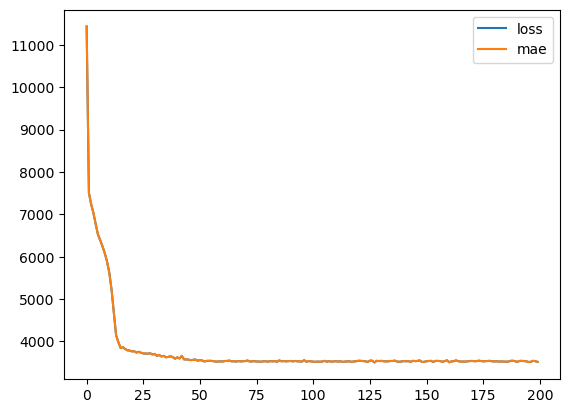

In [312]:
pd.DataFrame(history.history).plot()

> **Question:** How long should you train for? 

> It depends on what problem you're working on. Sometimes training won't take very long, other times it'll take longer than you expect. A common method is to set your model training for a very long time (e.g. 1000's of epochs) but set it up with an [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) so it stops automatically when it stops improving. We'll see this in another module.

## Preprocessing data (normalization and standardization)

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called **normalization** (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call **standardization** which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* [**Feature scaling**](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler):
    * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
    * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.
    * Which one should you use?
      * **With neural networks you'll tend to favour normalization** as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

In [313]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - build a multi-step data preprocessing function for the folllowing trnasformations:
  * [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - make sure all numerical columns are normalized (between 0 and 1).
  * [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - one hot encode the non-numerical columns.

In [315]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [316]:
# Creating a Column Transformer to help Normalize Numeric Columns and 
# One Hot Encode Categorical Columns all together:

ct = make_column_transformer(
                (MinMaxScaler(), ["age", "bmi", "children"]),
                (OneHotEncoder(handle_unknown= "ignore"), ["sex", "smoker", 
                                                          "region"]))

In [323]:
# Creating Featues and Target Data from Original Data:
X = df.drop("charges", axis= 1)
y = df["charges"]

In [324]:
# Train Test Split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,
                                                   random_state= 42)

In [325]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [326]:
X_train.head()

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
1285,47,female,24.32,0,no,northeast
1142,52,female,24.86,0,no,southeast
969,39,female,34.32,5,no,southeast
486,54,female,21.47,3,no,northwest


In [327]:
# Fitting Column Transformer on Training Data only.
# Fitting on Test Data would result in Data Leakage.

In [328]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [329]:
# Trasfroming Training and Test Data:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [332]:
# Comparing What our Data Looks like Now to How it Looked Before Trasformation:

X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [333]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [337]:
type(X_train_normal)

numpy.ndarray

In [338]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
reg_model2

Our data is normalized and numerical, let's model it.

We'll use the same model as `reg_model2`

In [340]:
# Building Neural Network:

tf.random.set_seed(42)

reg_model3 = Sequential()

reg_model3.add(Dense(100))
reg_model3.add(Dense(10))
reg_model3.add(Dense(1))

reg_model3.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 0.01),
                  loss= "mae",
                  metrics= ["mae"])

reg_model3.fit(X_train_normal, y_train, epochs= 200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13259.3750 - mae: 13259.3750  
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12163.2500 - mae: 12163.2500
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8471.6963 - mae: 8471.6963
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 7615.2466 - mae: 7615.2466
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7164.3145 - mae: 7164.3145 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6583.1997 - mae: 6583.1997
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5739.3477 - mae: 5739.3477  
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4571.3110 - mae: 4571.3110
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3755.2432 - mae: 3755.2432
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3634.8564 - mae: 3634.8564 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3626.4824 - mae: 3626.4824 
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3580.8018 - mae: 3580.8018 
Epoch 136/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3585.1567 - mae: 3585.1567 
Epoch 137/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3584.8730 - mae: 3584.8730
Epoch 138/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3583.9014 - mae: 3583.9014
Epoch 139/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3583.4517 - mae: 3583.4517
Epoch 140/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3580.1299 - mae: 3580.1299 
Epoch 141/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3581.9304 - mae: 3581.9304
Epoch 142/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3582.1892 - mae: 3582.1892
Epoch 143/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3582.9146 - mae: 3582.9146 
Epoch 144/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3583.8503 - mae: 3583.8503 
Epoch 145/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3580.4517 - mae: 3580.4517
Epoch 146/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [341]:
# Evaluating The Model:
reg_model3.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3220.3455 - mae: 3220.3455  


[3166.215087890625, 3166.215087890625]

**One of the main benefits of normalization: faster convergence time** (a fancy way of saying, your model gets to better results faster).

`reg_model2` may have eventually achieved the same results as `reg_model3` if we left it training for longer. 

Also, the results may change if we were to alter the architectures of the models, e.g. more hidden units per layer or more layers.

But since our main goal as neural network practioners is to decrease the time between experiments, anything that helps us get better results sooner is a plus.